## Pfizer Vaccine Tweet Analysis

* Exploratory Data Analysis
* Sentiment Analysis
* Word Embedding Analysis

In [1]:
# import libraries
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import utils
from utils.plot_utils import *
from utils.sent_utils import *


In [2]:
dataset = pd.read_csv('../data/vaccination_tweets.csv')
print('columns: ', dataset.columns)

columns:  Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')


### Exploratory Data Analysis

* Most common hashtags
* Users with largest number of followers
* Locations with largest number of tweets
* Analysis of tweets over time

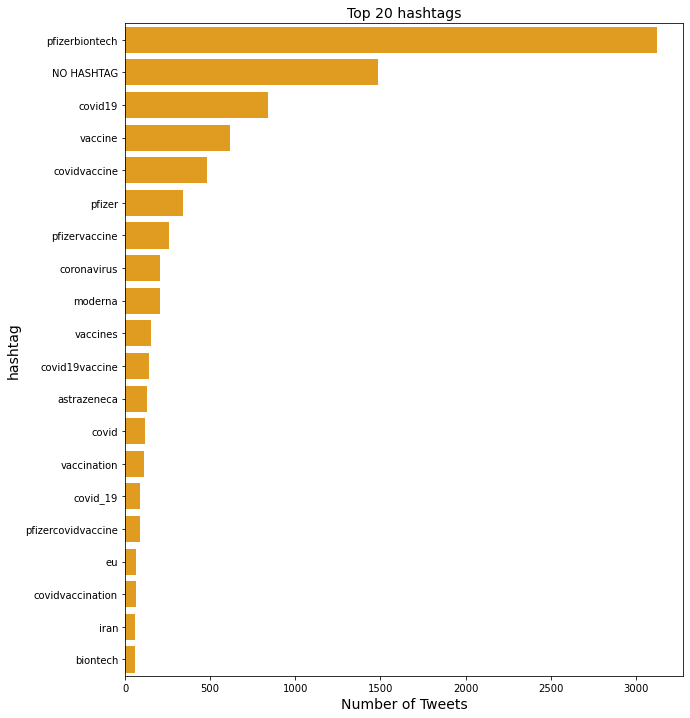

In [3]:
# clean hashtag data and add to a new dataframe
def split_hashtags(x): 
    return str(x).replace('[', '').replace(']', '').split(',')

dataset_hashtags = dataset.copy()
dataset_hashtags['hashtag'] = dataset_hashtags['hashtags'].apply(lambda row : split_hashtags(row))
dataset_hashtags = dataset_hashtags.explode('hashtag')
dataset_hashtags['hashtag'] = dataset_hashtags['hashtag'].astype(str).str.lower().str.replace("'", '').str.replace(" ", '')
dataset_hashtags.loc[dataset_hashtags['hashtag']=='nan', 'hashtag'] = 'NO HASHTAG'
    
# plot top 20 most used hashtags
plot_count('hashtag', 'Top 20 hashtags', 'hashtag', 'Number of Tweets', dataset_hashtags, num_show=20, horizontal = True)

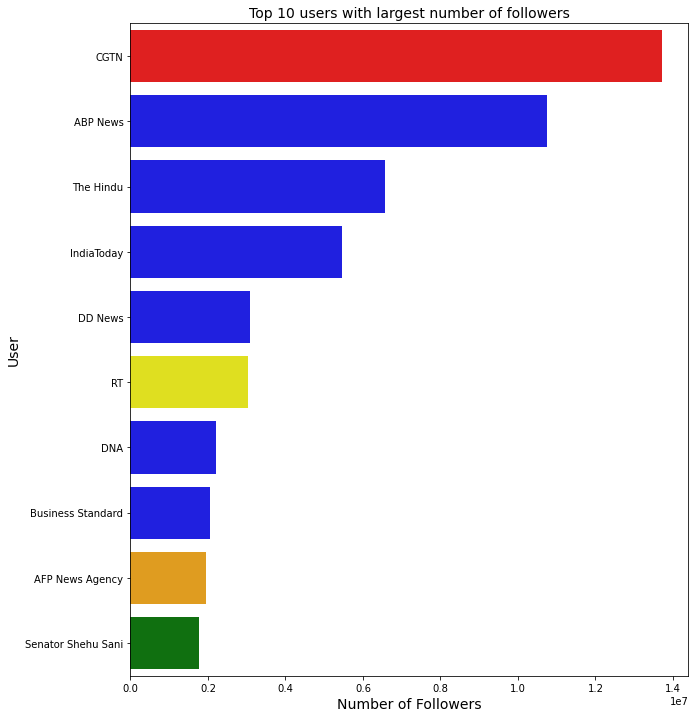

In [4]:
# plot top 10 users with largest number of followers
dataset_users = dataset.copy()
plot_by_feature('user_followers', 'Top 10 users with largest number of followers', 'User', 'Number of Followers', dataset_users, num_show=10, horizontal=True)

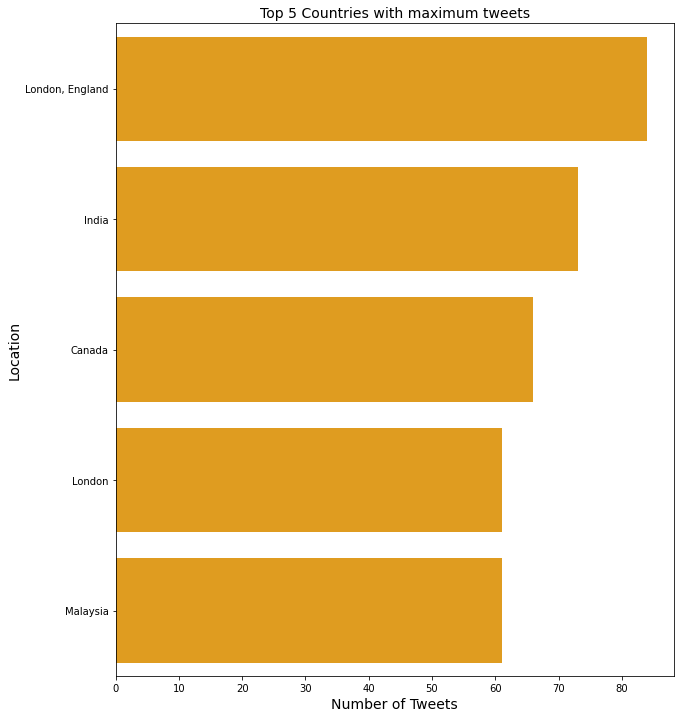

In [5]:
# Locations with largest number of tweets
dataset_countries = dataset.copy()
plot_count('user_location', 'Top 5 Countries with maximum tweets', 'Location', 'Number of Tweets', dataset_countries, num_show=5, horizontal=True)

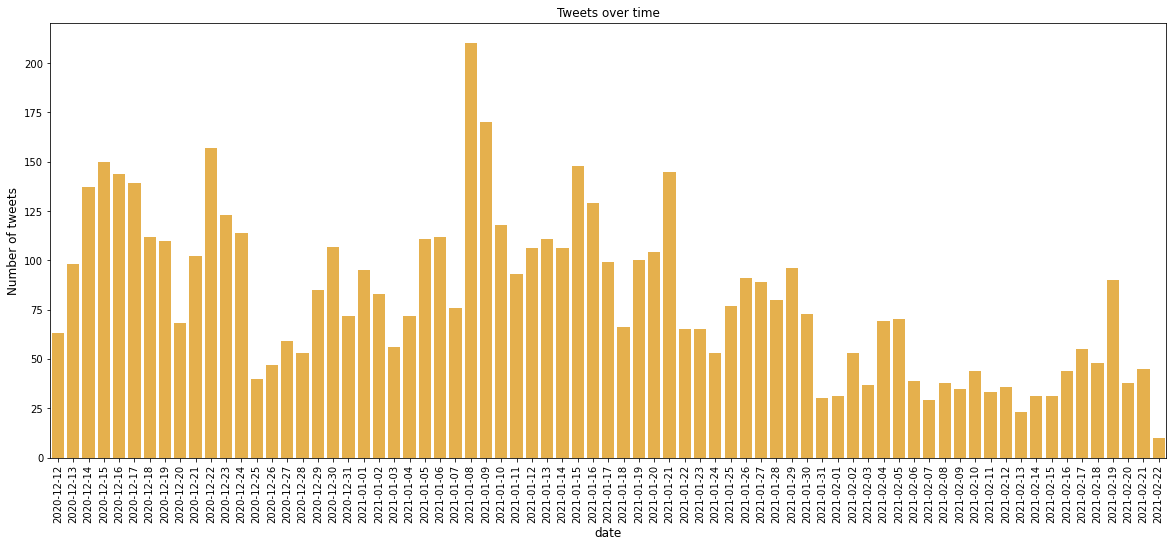

In [6]:
# Analysis of tweets over time
dataset_date = dataset.copy()
plot_over_time(dataset_date, 'date')

### Textblob Sentiment Analysis
* Sentiment percentage
    * All sentiments
    * Subjective sentiments
    * Objective sentiments
* Wordcloud
    * Common words in extreme tweets
    * Extreme words in all tweets

In [7]:
# Clean up the data a bit more
dataset_tb = dataset.copy()
dataset_tb.text = dataset_tb.text.str.lower()
dataset_tb.text = dataset_tb.text.apply(lambda x:re.sub('@[^\s]+','',x))
dataset_tb.text = dataset_tb.text.apply(lambda x:re.sub(r'\B#\S+','',x))
dataset_tb.text = dataset_tb.text.apply(lambda x:re.sub(r"http\S+", "", x))
dataset_tb.text = dataset_tb.text.apply(lambda x:' '.join(re.findall(r'\w+', x)))
dataset_tb.text = dataset_tb.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
dataset_tb.text = dataset_tb.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [8]:
# Subjectivity and polarity calculation
cal_sub_pol(dataset_tb)
dataset_tb.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Subjectivity,Polarity,Score,SubScore
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,same folks said daikon paste could treatcytoki...,['PfizerBioNTech'],Twitter for Android,0,0,False,0.125000,0.00,Neutral,Objective
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,while the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,0.900000,-0.50,Negative,Subjective
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,russian vaccine is created to last 2 4 years,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.033333,0.00,Neutral,Objective
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,facts are immutable senator even when you re n...,NaN,Twitter Web App,446,2129,False,0.550000,-0.05,Negative,Subjective
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,explain to me again why we needvaccine,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0.000000,0.00,Neutral,Objective


42.051195688784105 % of positive tweets
47.62546311889525 % of neutral tweets
10.323341192320648 % of negative tweets


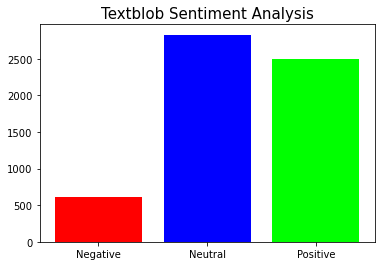

In [9]:
# Plot sentiment percentage
plot_all_sent(dataset_tb)

75.28494301139771 % of positive tweets
8.578284343131374 % of neutral tweets
16.136772645470906 % of negative tweets


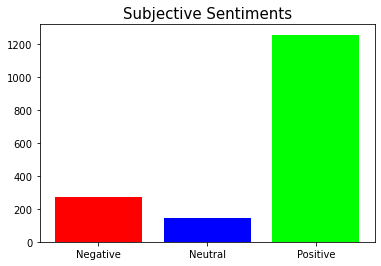

In [10]:
# Plot subjective sentiments
plot_sub_sent(dataset_tb)

29.079840786701006 % of positive tweets
62.86583938187778 % of neutral tweets
8.054319831421212 % of negative tweets


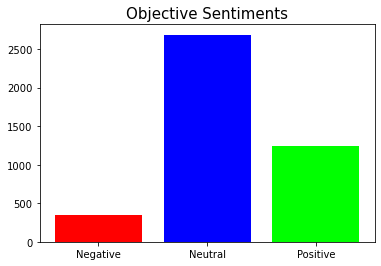

In [11]:
# Plot objective sentiments
plot_obj_sent(dataset_tb)

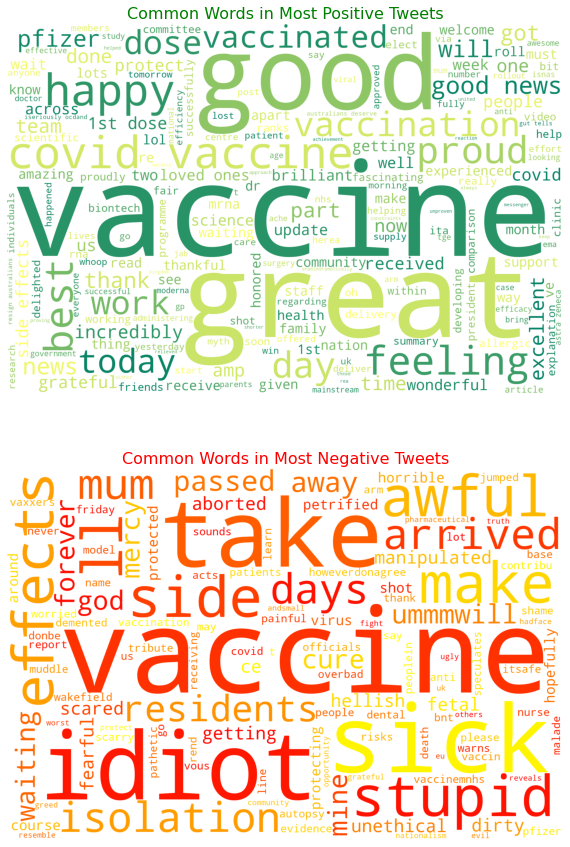

In [12]:
# Most common words
plot_com(dataset_tb)

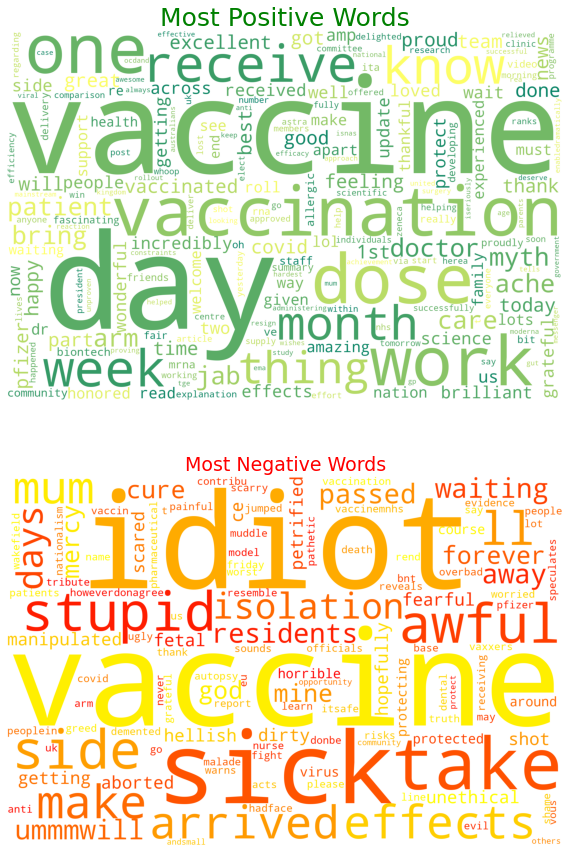

In [13]:
# Extreme words
plot_most(dataset_tb)

### Word Embedding Analysis

* Enter contents here 